In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('seaborn')
sns.set(font_scale=2)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.set_random_seed(777)
import datetime

In [2]:
df_train = pd.read_csv('./data/train.csv')

In [3]:
df_train.drop(['time'],axis=1, inplace=True)

In [4]:
df_train.head()

,date&time,WashingMachine,Dryer,temp,icon,hum,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01 0:00,0.005686,0.005231,16.67,clear-night,0.53,10.0,Clear,3.95,1022.69,11.23,0.00,271.0,0.0,2.41,0.0
1,2014-01-01 1:00,0.005635,0.005293,16.19,clear-night,0.52,10.0,Clear,4.18,1022.58,9.92,0.02,268.0,0.0,1.68,0.0
2,2014-01-01 2:00,0.005570,0.005368,15.69,clear-night,0.55,10.0,Clear,4.41,1023.61,8.72,0.00,266.0,0.0,2.59,0.0
3,2014-01-01 3:00,0.005543,0.005527,15.29,clear-night,0.58,10.0,Clear,4.29,1024.31,8.25,0.00,269.0,0.0,3.29,0.0
4,2014-01-01 4:00,0.005597,0.005630,15.37,clear-night,0.60,10.0,Clear,5.12,1024.51,7.38,0.06,266.0,0.0,3.95,0.0


In [5]:
train_data = [df_train]

for dataset in train_data:
    dataset['time'] = dataset['date&time'].str.extract('(\d*[:]\d*)', expand=False)

In [6]:
df_train['time'].value_counts()

9:00     730
22:00    730
1:00     730
12:00    730
21:00    730
20:00    730
2:00     730
3:00     730
6:00     730
5:00     730
19:00    730
10:00    730
16:00    730
14:00    730
11:00    730
8:00     730
13:00    730
23:00    730
4:00     730
18:00    730
15:00    730
17:00    730
0:00     730
7:00     730
Name: time, dtype: int64

In [7]:
df_train.drop(['date&time', 'icon', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing'
              , 'precipIntensity', 'dewPoint', 'precipProbability'], axis=1, inplace=True)

In [8]:
train_data = [df_train]

In [9]:
time_mapping = {"0:00":0, "1:00":1, "2:00":2, "3:00":3, "4:00":4, "5:00":5, "6:00":6, "7:00":7, "8:00":8, "9:00":9, "10:00":10,
               "11:00":11, "12:00":12, "13:00":13, "14:00":14, "15:00":15, "16:00":16, "17:00":17, "18:00":18, "19:00":19, "20:00":20, "21:00":21, 
               "22:00":22, "23:00":23}
for dataset in train_data:
    dataset['time'] = dataset['time'].map(time_mapping)

In [10]:
df_train.groupby(['time']).mean()

,WashingMachine,Dryer,temp,hum
time,,,,
0,0.004338,0.007573,43.363712,0.768178
1,0.004834,0.003803,42.610904,0.780411
2,0.002890,0.003781,41.971822,0.792781
3,0.002728,0.003760,41.343644,0.801890
4,0.002697,0.003725,40.774096,0.811548
5,0.002872,0.003704,40.299110,0.817219
6,0.002945,0.004045,39.984521,0.820329
7,0.003736,0.007106,40.486644,0.816123
8,0.005205,0.006435,42.416205,0.786534


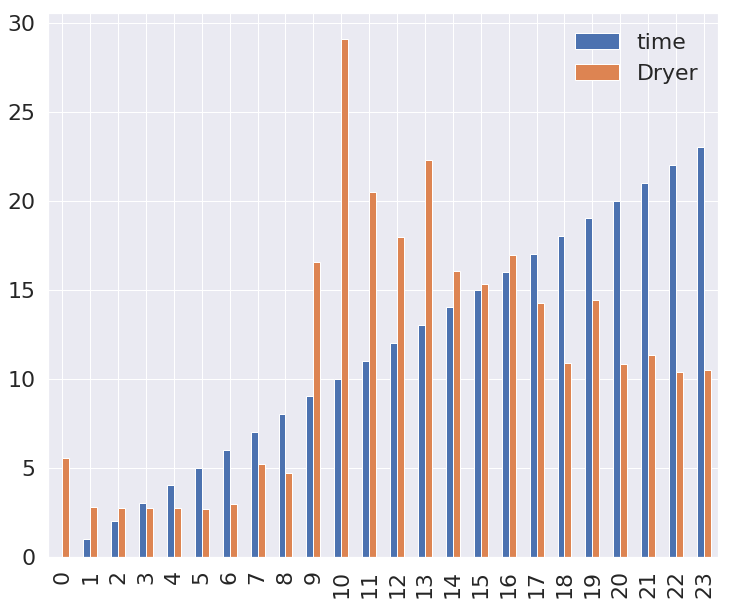

In [11]:
df_train[['Dryer', 'time']].groupby(['time'], as_index=False).sum().sort_values(by='time', ascending=True).plot.bar(figsize=(12,10))

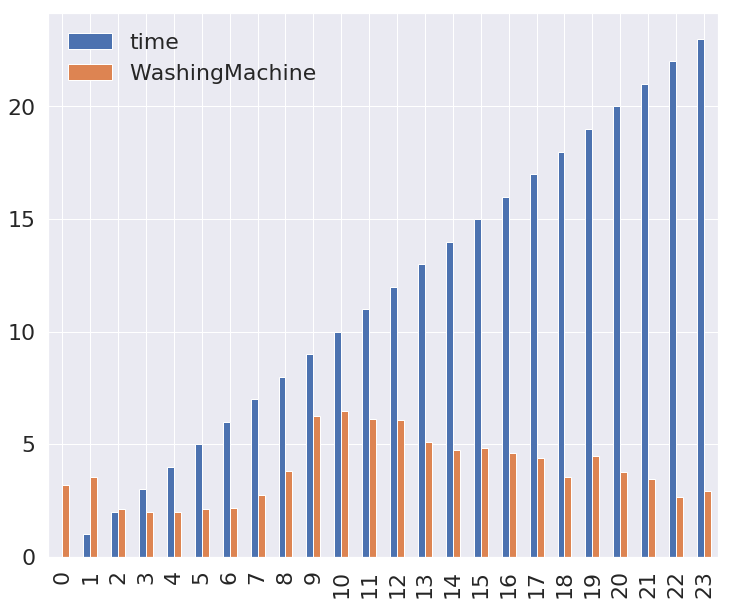

In [12]:
df_train[['WashingMachine', 'time']].groupby(['time'], as_index=False).sum().sort_values(by='time', ascending=True).plot.bar(figsize=(12,10))

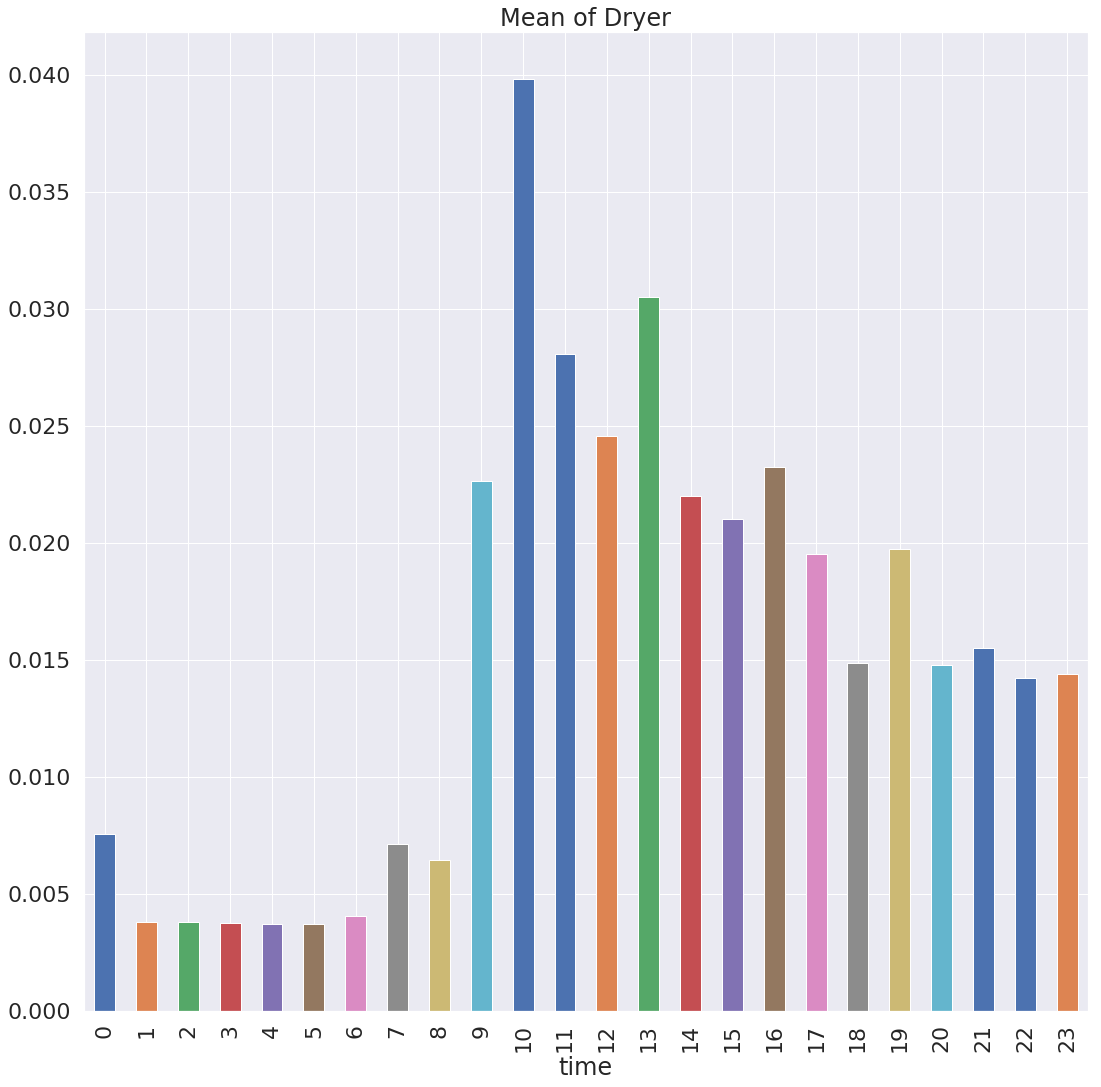

In [13]:
df_train.groupby('time')['Dryer'].mean().plot.bar(figsize=(18, 18), title='Mean of Dryer', y=1.02)

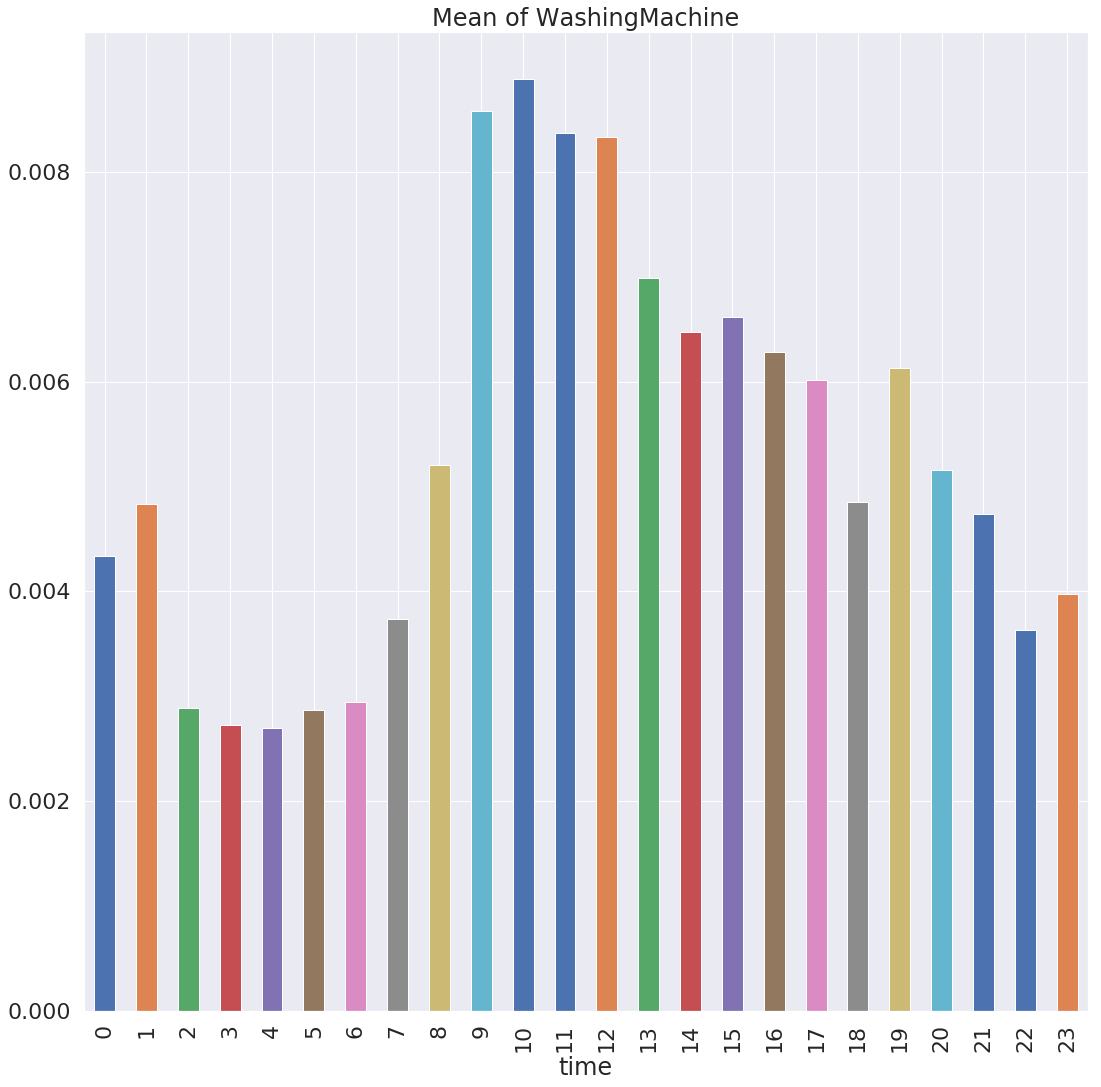

In [14]:
df_train.groupby('time')['WashingMachine'].mean().plot.bar(figsize=(18, 18), title='Mean of WashingMachine', y=1.02)

In [15]:
def plot_Dryer(i):
    plt.figure(figsize=(12, 12))
    plt.plot(np.arange(24), df_train['Dryer'][i*24:i*24+24])
    plt.title("{} Day Dryer Pattern".format(i))
    
def plot_WM(i):
    plt.figure(figsize=(12, 12))
    plt.plot(df_train['WashingMachine'][i*24:i*24+24])
    plt.title("{} Day WashingMachine Pattern".format(i))

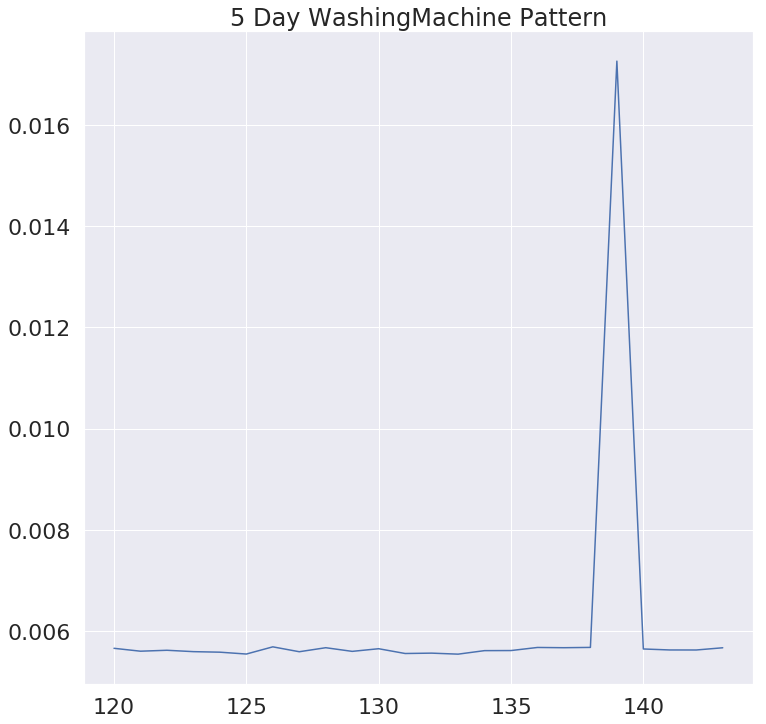

In [16]:
plot_WM(5)

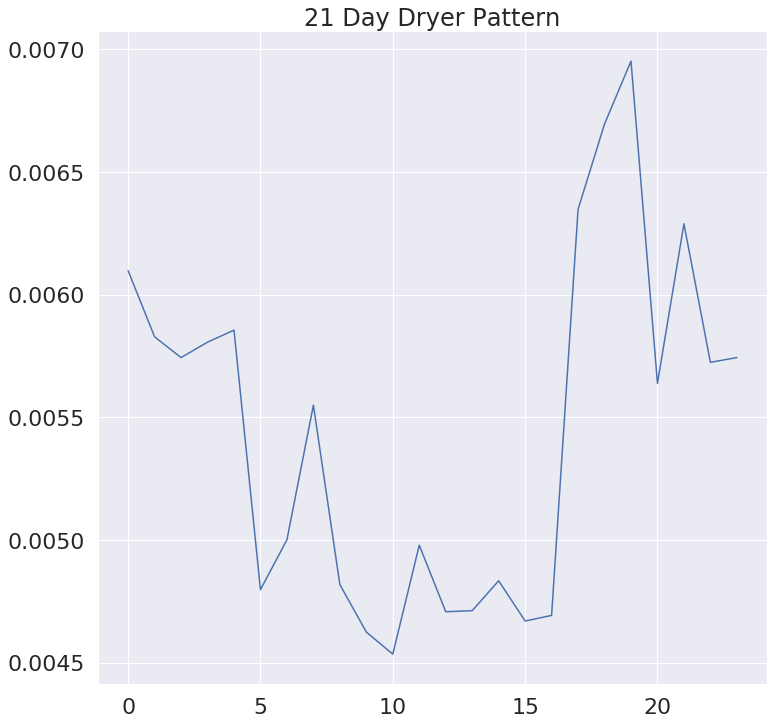

In [17]:
plot_Dryer(21)

In [18]:
df_train.head()

,WashingMachine,Dryer,temp,hum,time
0,0.005686,0.005231,16.67,0.53,0
1,0.005635,0.005293,16.19,0.52,1
2,0.005570,0.005368,15.69,0.55,2
3,0.005543,0.005527,15.29,0.58,3
4,0.005597,0.005630,15.37,0.60,4


In [19]:
from sklearn.preprocessing import MinMaxScaler

df_train_np = df_train.values.astype(np.float)
scaler = MinMaxScaler()

In [20]:
df_train_np.shape

(17520, 5)

In [21]:
washingmachine = df_train_np[:, 1:2]
norm_washingmachine = scaler.fit_transform(washingmachine)

dryer = df_train_np[:, 2:3]
norm_dryer = scaler.fit_transform(dryer)

temp = df_train_np[:, 3:4]
norm_temp = scaler.fit_transform(temp)

hum = df_train_np[:, 4:5]
norm_hum = scaler.fit_transform(hum)

time = df_train_np[:, -1:]
norm_time = scaler.fit_transform(time)

x = np.concatenate((norm_temp, norm_hum, norm_time), axis=1)
print(x.shape)

y = norm_dryer
print(y.shape)

(17520, 3)
(17520, 1)


In [22]:
train_size = int(len(y) * 0.7)
test_size = len(y) - train_size

trainX = np.array(x[0:train_size])
trainY = np.array(y[0:train_size])

testX = np.array(x[train_size:])
testY = np.array(y[train_size:])

In [27]:
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = tf.matmul(X, W) + b

targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

In [30]:
cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [32]:
train_error_summary = []
test_error_summary = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X:trainX, Y:trainY})
        if step % 100 == 0:
            train_predict = sess.run(hypothesis, feed_dict={X:trainX})
            train_error = sess.run(rmse, feed_dict = {targets:trainY, predictions:train_predict})
            train_error_summary.append(train_error)
            
            test_predict = sess.run(hypothesis, feed_dict={X:testX})
            test_error = sess.run(rmse, feed_dict={targets:testY, predictions:test_predict})
            test_error_summary.append(test_error)
            print(step, "Cost : ", cost_val, "\n", W_val, "x + ", b_val, "\n", "train_error :", train_error, "\ntest_error : ", test_error)
        
    print(sess.run(hypothesis, feed_dict={X:testX}))

0 Cost :  1.4133904 
 [[-1.6303018 ]
 [-0.6191438 ]
 [ 0.99825114]] x +  [0.35140806] 
 train_error : 1.1493691 
test_error :  1.36892
100 Cost :  0.15498026 
 [[-1.1218058]
 [-0.4879956]
 [ 1.1293994]] x +  [0.9142038] 
 train_error : 0.39292866 
test_error :  0.41142085
200 Cost :  0.11237252 
 [[-0.9812012]
 [-0.589835 ]
 [ 1.02756  ]] x +  [0.9514077] 
 train_error : 0.33475804 
test_error :  0.33934093
300 Cost :  0.08873596 
 [[-0.8740701 ]
 [-0.66635895]
 [ 0.95103616]] x +  [0.96472096] 
 train_error : 0.29759112 
test_error :  0.29859245
400 Cost :  0.07515584 
 [[-0.78760576]
 [-0.7209087 ]
 [ 0.8964864 ]] x +  [0.96736187] 
 train_error : 0.2739582 
test_error :  0.27226654
500 Cost :  0.06704958 
 [[-0.7165784]
 [-0.7593806]
 [ 0.8580145]] x +  [0.9626356] 
 train_error : 0.2588178 
test_error :  0.25514325
600 Cost :  0.06195334 
 [[-0.6572156]
 [-0.7861501]
 [ 0.831245 ]] x +  [0.95283186] 
 train_error : 0.2488221 
test_error :  0.24378482
700 Cost :  0.05853966 
 [[-0.6

No handles with labels found to put in legend.


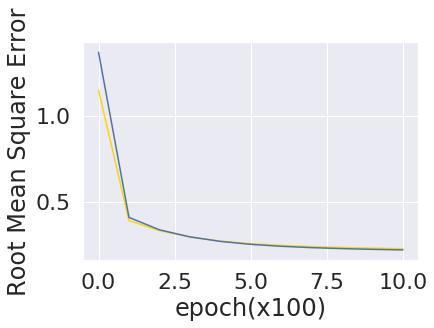

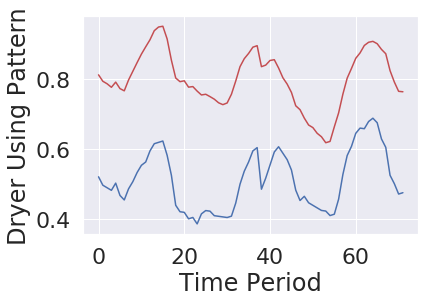

In [46]:
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('epoch(x100)')
plt.ylabel('Root Mean Square Error')

plt.figure(2)
plt.plot(testY[:72], 'r')
plt.plot(test_predict[:72], 'b')
plt.xlabel('Time Period')
plt.ylabel('Dryer Using Pattern')
plt.show()

array([[0.81323331],
       [0.7948644 ],
       [0.78765147],
       [0.77764955],
       [0.79246009],
       [0.77389883],
       [0.76755145],
       [0.79851895],
       [0.82342758],
       [0.84833622],
       [0.87247548],
       [0.8932487 ],
       [0.91344489],
       [0.93941143],
       [0.94989421],
       [0.95210617],
       [0.9158492 ],
       [0.85477977],
       [0.80419311],
       [0.79371033],
       [0.79621081],
       [0.77803424],
       [0.77966917],
       [0.76678207]])